#### Calculate reference period percentiles of gridded monthly P and PminusPET. These will be used to identify drought time periods. To be compared with the SPI/SPEI based calc.

In [1]:
%who

Interactive namespace is empty.


In [2]:
import numpy as np
import xarray as xr
import pandas as pd
import glob
import matplotlib.pyplot as plt
%run -i drought_2017to2020/alldata_info.py
    
data_dir = '/g/data/w97/ad9701/drought_2017to2020/PminusPET/'
out_dir = data_dir + '10th_percentile/'

data_type = (data_dir.split('/')[-2]).split('_')[0]

ref_time_slice = slice('1981-01-01', '2020-05-31')

# for d in ['chirps', 'agcd']:  #mswep
for d in ['gleam', 'awra']:  #mswep
    if data_type == 'precip':
        vname = alldata_dict[d]['varname']
    elif data_type == 'PminusPET':
        vname = 'PminusPET'
    
    ds = xr.open_dataset(data_dir + alldata_dict[d]['mon_file'])
    da = ds[vname].sel(time = ref_time_slice)
    da_10th_perc = da.groupby('time.month').quantile(0.1, dim = 'time')
    out_file = out_dir + d + '_10th_perc_threshold.nc'
    da_10th_perc.to_netcdf(out_file)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


In [2]:
from dask.distributed import Client, LocalCluster
cluster = LocalCluster()
client = Client(cluster)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 4
Total threads: 8,Total memory: 22.46 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:33461,Workers: 4
Dashboard: /proxy/8787/status,Total threads: 8
Started: Just now,Total memory: 22.46 GiB
Comm: tcp://10.0.128.142:38631,Total threads: 2
Dashboard: /proxy/32885/status,Memory: 5.62 GiB
Nanny: tcp://127.0.0.1:46185,


In [3]:
import numpy as np
import xarray as xr
import pandas as pd
import glob
import matplotlib.pyplot as plt
%run -i drought_2017to2020/alldata_info.py
    
data_dir = '/g/data/w97/ad9701/drought_2017to2020/precip_data/'
out_dir = data_dir + '20th_percentile/'

data_type = (data_dir.split('/')[-2]).split('_')[0]

ref_time_slice = slice('1981-01-01', '2020-05-31')

for d in ['chirps', 'agcd', 'mswep']:
# for d in ['gleam', 'awra']:  #mswep
    if data_type == 'precip':
        vname = alldata_dict[d]['varname']
    elif data_type == 'PminusPET':
        vname = 'PminusPET'
    
    ds = xr.open_dataset(data_dir + alldata_dict[d]['mon_file'])
    da = ds[vname].sel(time = ref_time_slice)
    da_10th_perc = da.groupby('time.month').quantile(0.2, dim = 'time')
    out_file = out_dir + d + '_20th_perc_threshold.nc'
    da_10th_perc.to_netcdf(out_file)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


In [2]:
import numpy as np
import xarray as xr
import pandas as pd
import glob
import matplotlib.pyplot as plt
%run -i drought_2017to2020/alldata_info.py
    
data_dir = '/g/data/w97/ad9701/drought_2017to2020/precip_data/'
out_dir = data_dir + '10th_percentile_nonzero/'

data_type = (data_dir.split('/')[-2]).split('_')[0]

ref_time_slice = slice('1981-01-01', '2020-05-31')

for d in ['chirps', 'agcd', 'mswep']:
# for d in ['gleam', 'awra']:  #mswep
    if data_type == 'precip':
        vname = alldata_dict[d]['varname']
    elif data_type == 'PminusPET':
        vname = 'PminusPET'
    
    ds = xr.open_dataset(data_dir + alldata_dict[d]['mon_file'])
    da = ds[vname].sel(time = ref_time_slice)
    da_nonzero = da.where(da > 0)
    da_10th_perc = da_nonzero.groupby('time.month').quantile(0.1, dim = 'time')
    out_file = out_dir + d + '_10th_perc_threshold.nc'
    da_10th_perc.to_netcdf(out_file)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


In [6]:
alldata_dict['mswep']

{'full_path': ['/g/data/fj4/SatellitePrecip/MSWEP_V280/Past/Monthly/',
  '/g/data/fj4/SatellitePrecip/MSWEP_V280/NRT/Monthly/'],
 'file_name': '*.nc',
 'varname': 'precipitation',
 'lat_slice': slice(-10, -44, None),
 'lon_slice': slice(112, 154, None),
 'units': 'mm month-1',
 'rename_latlon': False,
 'land_mask': False,
 'mon_file': 'precipitation_mswep_monthly_1979_2021.nc'}

In [7]:
import xarray as xr

d = 'agcd'

data_dir = '/g/data/w97/ad9701/drought_2017to2020/precip_data/'
ds = xr.open_dataset(data_dir + '10th_percentile/' + d + '_10th_perc_threshold.nc')
ds_mask = xr.open_dataset(data_dir + d + '_land_mask.nc')

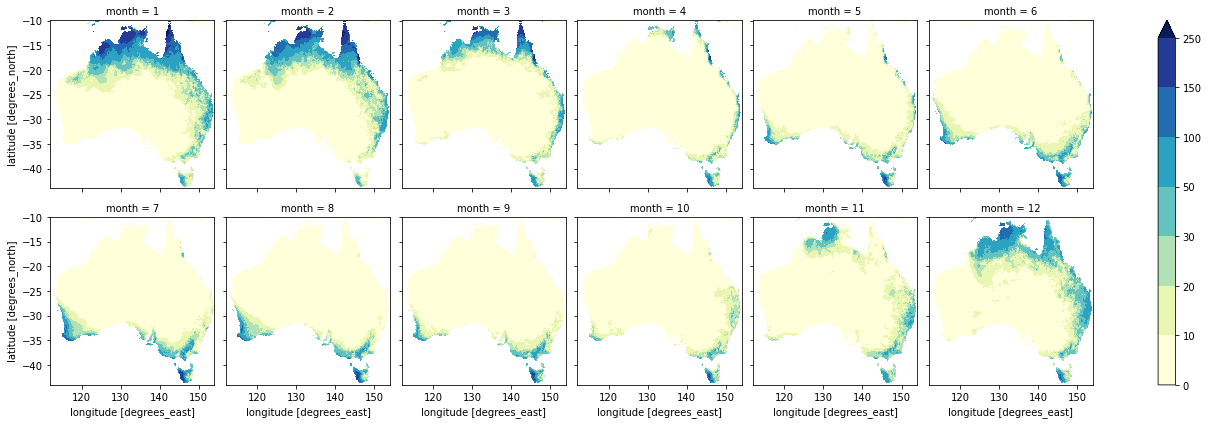

In [11]:
levels = [0, 10, 20, 30, 50, 100, 150, 250]

(ds['precip']*ds_mask['land_mask']).plot(col='month', col_wrap = 6, levels = levels, cmap = 'YlGnBu')

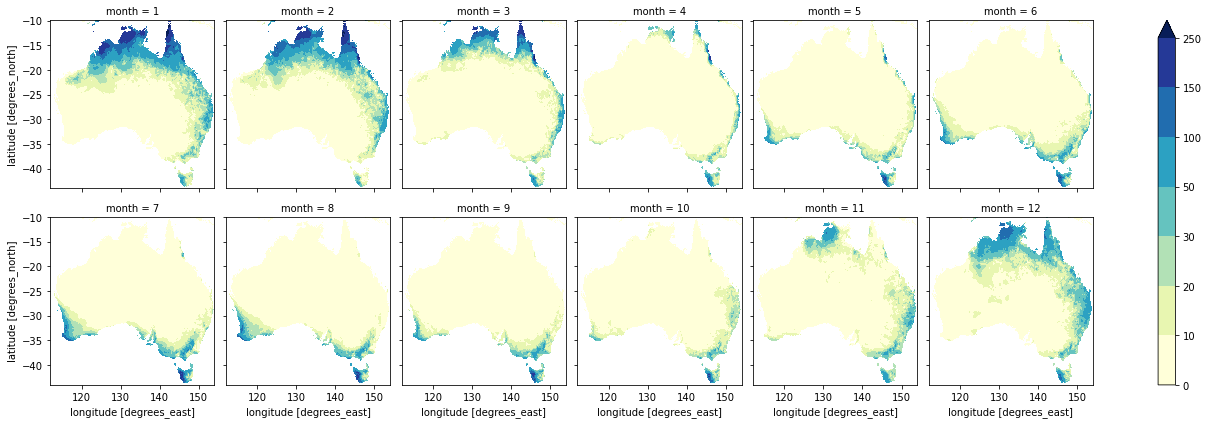

In [3]:
d = 'agcd'

data_dir = '/g/data/w97/ad9701/drought_2017to2020/precip_data/'
ds = xr.open_dataset(data_dir + '10th_percentile_nonzero/' + d + '_10th_perc_threshold.nc')
ds_mask = xr.open_dataset(data_dir + d + '_land_mask.nc')

levels = [0, 10, 20, 30, 50, 100, 150, 250]
(ds['precip']*ds_mask['land_mask']).plot(col='month', col_wrap = 6, levels = levels, cmap = 'YlGnBu')

In [4]:
ds_wzero = xr.open_dataset(data_dir + '10th_percentile/' + d + '_10th_perc_threshold.nc')

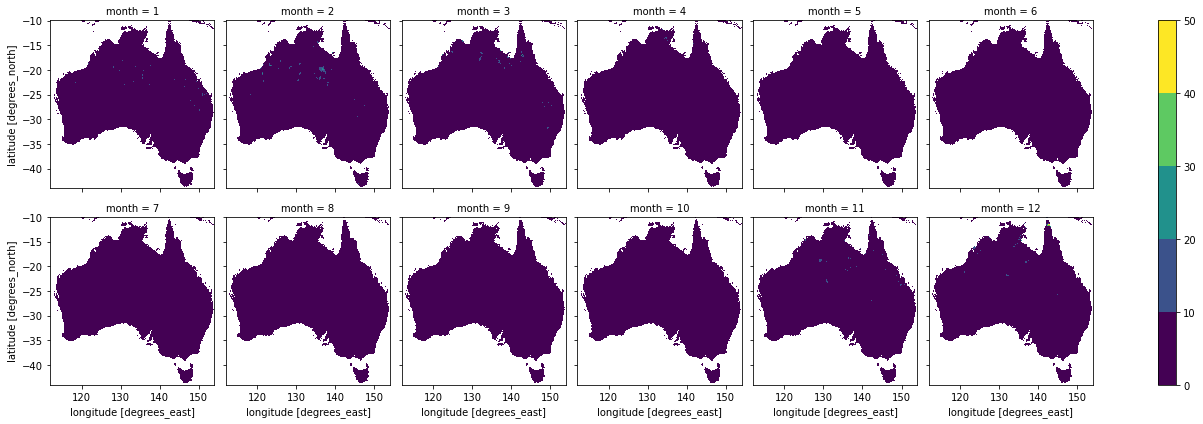

In [6]:
((ds['precip']-ds_wzero['precip'])*ds_mask['land_mask']).plot(col='month', col_wrap = 6, levels = 6) #, cmap = 'RdBu')

## Percentiles of combined JJAS data

In [11]:
%who

add_cyclic_point	 agcd_info	 alldata_dict	 awra_info	 ccrs	 cfeature	 chirps_info	 cticker	 d	 
da	 da_10th_perc	 data_dir	 data_type	 draw_spatial_plot	 draw_spatial_plot_3panels	 ds	 get_da	 gleam_info	 
glob	 mon_sel	 mswep_info	 np	 out_dir	 pd	 plt	 ref_time_slice	 regrid_all_from_list	 
save_monthly_data	 sys	 vname	 xe	 xr	 


In [12]:
import numpy as np
import xarray as xr
import pandas as pd
import glob
import matplotlib.pyplot as plt
%run -i drought_2017to2020/alldata_info.py

data_dir = '/g/data/w97/ad9701/drought_2017to2020/precip_data/'
out_dir = data_dir + '10th_percentile_JJAS/'

data_type = (data_dir.split('/')[-2]).split('_')[0]
ref_time_slice = slice('1981-01-01', '2020-05-31')
mon_sel = [6, 7, 8, 9]

for d in ['chirps', 'agcd', 'mswep']:
# for d in ['gleam', 'awra']:  #mswep
    if data_type == 'precip':
        vname = alldata_dict[d]['varname']
    elif data_type == 'PminusPET':
        vname = 'PminusPET'
    
    ds = xr.open_dataset(data_dir + alldata_dict[d]['mon_file'])
    da = ds[vname].sel(time = ref_time_slice)
    da = da.sel(time = da.time.dt.month.isin(mon_sel))
    da_10th_perc = da.groupby('time.year').sum().quantile(0.1, dim = 'year')
    
    out_file = out_dir + d + '_10th_perc_threshold.nc'
    da_10th_perc.to_netcdf(out_file)

In [ ]:
%who